In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df = pd.read_csv(r"C:\Users\asus\Downloads\vitamins_data.csv")
df.head()

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%
0,India,163819614,17.6,13.8
1,Delhi,2016849,17.8,32.5
2,Haryana,3335537,26.1,27.6
3,Himachal Pradesh,793137,5.9,4.6
4,Jammu & Kashmir,1485803,8.7,22.9


In [3]:
#We drop the first row 
df.drop(0,axis=0,inplace = True)

In [4]:
df.head()

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%
1,Delhi,2016849,17.8,32.5
2,Haryana,3335537,26.1,27.6
3,Himachal Pradesh,793137,5.9,4.6
4,Jammu & Kashmir,1485803,8.7,22.9
5,Punjab,3171829,17.2,52.1


In [5]:
#Start the indexing from 0
df.set_index([pd.Index(range(len(df)))], inplace = True)

In [6]:
df['Vitamin A Deficit']=df['VitA_deficit%'] * df['Population(0-6)years'] /100

In [7]:
df['Vitamin D Deficit']=df['VitD_deficit%'] * df['Population(0-6)years'] /100

In [8]:
df.head(2)

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%,Vitamin A Deficit,Vitamin D Deficit
0,Delhi,2016849,17.8,32.5,358999.122,655475.925
1,Haryana,3335537,26.1,27.6,870575.157,920608.212


In [9]:
df.shape

(30, 6)

In [10]:
#Calculating Duplicates
duplicated_df = df[df.duplicated()]
duplicated_df.shape

(0, 6)

In [11]:
#Dropping Duplicates
df = df.drop_duplicates()
df.head()

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%,Vitamin A Deficit,Vitamin D Deficit
0,Delhi,2016849,17.8,32.5,358999.122,655475.925
1,Haryana,3335537,26.1,27.6,870575.157,920608.212
2,Himachal Pradesh,793137,5.9,4.6,46795.083,36484.302
3,Jammu & Kashmir,1485803,8.7,22.9,129264.861,340248.887
4,Punjab,3171829,17.2,52.1,545554.588,1652522.909


In [12]:
df.count()

State                   30
Population(0-6)years    30
VitA_deficit%           28
VitD_deficit%           30
Vitamin A Deficit       28
Vitamin D Deficit       30
dtype: int64

In [13]:
#Counting Null Values
print(df.isnull().sum())

State                   0
Population(0-6)years    0
VitA_deficit%           2
VitD_deficit%           0
Vitamin A Deficit       2
Vitamin D Deficit       0
dtype: int64


In [14]:
#Dropping Null Values
df = df.dropna()
df.count()

State                   28
Population(0-6)years    28
VitA_deficit%           28
VitD_deficit%           28
Vitamin A Deficit       28
Vitamin D Deficit       28
dtype: int64

In [15]:
print(df.isnull().sum())

State                   0
Population(0-6)years    0
VitA_deficit%           0
VitD_deficit%           0
Vitamin A Deficit       0
Vitamin D Deficit       0
dtype: int64


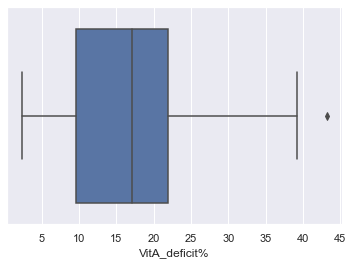

In [16]:
# Detecting Outliers
sns.boxplot(x=df["VitA_deficit%"]);

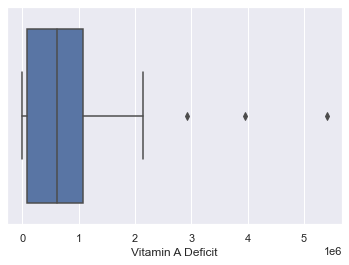

In [17]:
sns.boxplot(x=df["Vitamin A Deficit"]);

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

Population(0-6)years    6.597624e+06
VitA_deficit%           1.237500e+01
VitD_deficit%           1.635000e+01
Vitamin A Deficit       9.891992e+05
Vitamin D Deficit       7.907004e+05
dtype: float64


In [19]:
df = df[~((df<(Q1-1.5*IQR))|(df > (Q3+1.5*IQR))).any(axis=1)]

In [20]:
df.shape

(23, 6)

In [21]:
df.head()

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%,Vitamin A Deficit,Vitamin D Deficit
0,Delhi,2016849,17.8,32.5,358999.122,655475.925
1,Haryana,3335537,26.1,27.6,870575.157,920608.212
2,Himachal Pradesh,793137,5.9,4.6,46795.083,36484.302
3,Jammu & Kashmir,1485803,8.7,22.9,129264.861,340248.887
6,Uttarakhand,1360032,14.3,46.4,194484.576,631054.848


<AxesSubplot:title={'center':'Vitamin A and D Deficiency %'}, xlabel='State'>

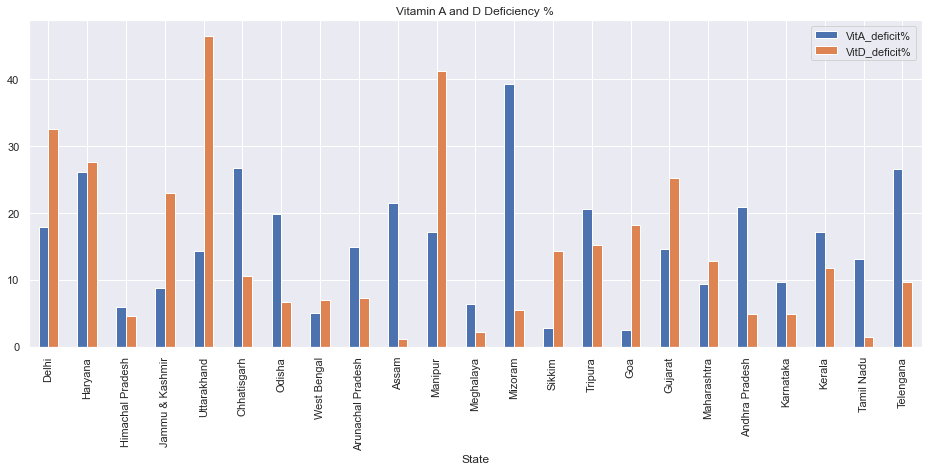

In [22]:
fig, ax = plt.subplots(figsize=(16,6))
df.plot(x='State', y = ['VitA_deficit%', 'VitD_deficit%'], kind = 'bar',
       title = 'Vitamin A and D Deficiency %', grid=True,ax=ax)

<AxesSubplot:title={'center':'Vitamin A and D Deficiency Total'}, xlabel='State'>

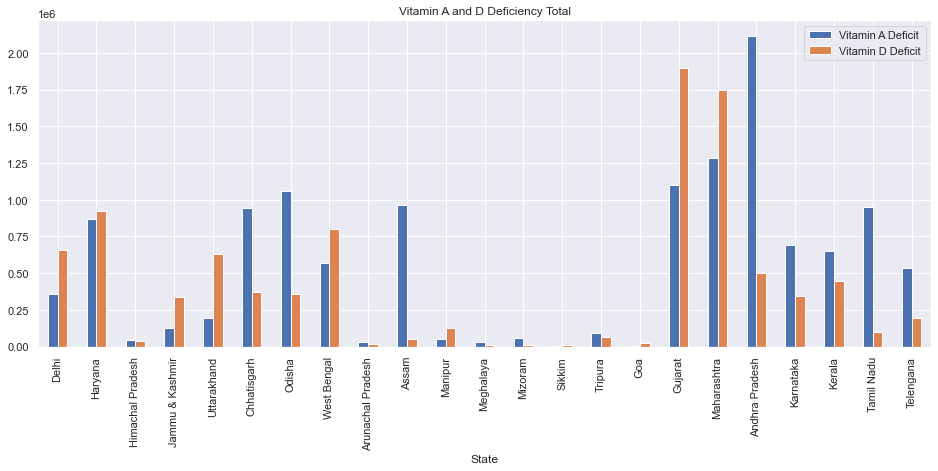

In [23]:
fig, ax = plt.subplots(figsize=(16,6))
df.plot(x='State', y = ['Vitamin A Deficit', 'Vitamin D Deficit'], kind = 'bar',
       title = 'Vitamin A and D Deficiency Total', grid=True,ax=ax)

In [24]:
train = df[['VitA_deficit%', 'VitD_deficit%', 'Vitamin A Deficit', 'Vitamin D Deficit']]

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler().fit(train)
train_std = sc.transform(train)

In [27]:
!pip install yellowbrick

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


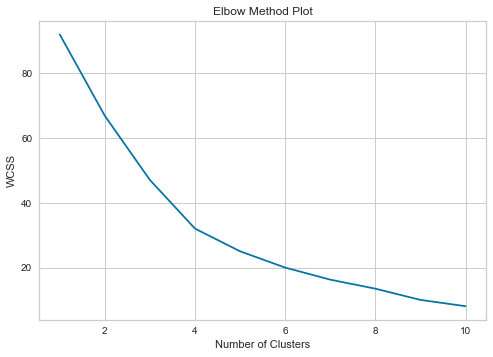

In [30]:
wcss =[]
#wcss = Within Cluster Sum of Squares
for i in range(1,11):
    kmns= KMeans(n_clusters = i, init = 'k-means++', random_state =23)
    kmns.fit(train_std)
    wcss.append(kmns.inertia_)
    
#Plotting to find the optimum number of clusters    
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method Plot')
plt.grid(True)
plt.show()


In [31]:
from sklearn.metrics import silhouette_score, silhouette_samples

The silhouette score for no. of cluster k =  3  is :-  0.281693760692738
The silhouette score for no. of cluster k =  4  is :-  0.35023383713328315
The silhouette score for no. of cluster k =  5  is :-  0.33946961576419443
The silhouette score for no. of cluster k =  6  is :-  0.3023839420149433


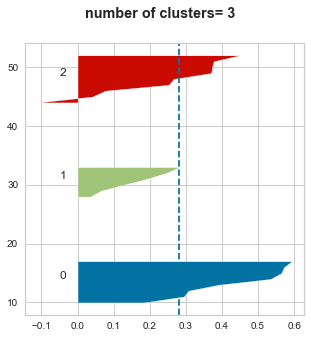

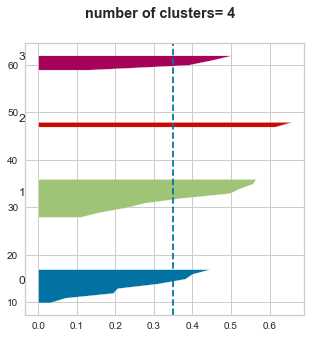

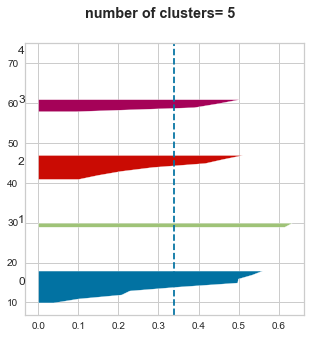

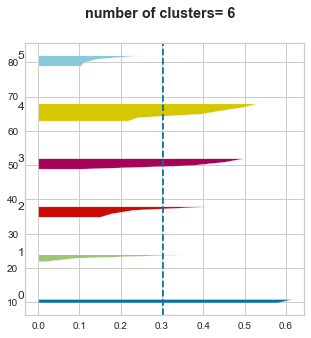

In [32]:
predict = []
for i in range(3,7):
    k = KMeans(n_clusters=i, random_state=23)
    pred= k.fit_predict(train_std)
    predict.append(pred)
    score =silhouette_score(train_std,pred)
    print('The silhouette score for no. of cluster k = ',i ,' is :- ', score)
    sil_sam = silhouette_samples(train_std,pred)
    fig,ax = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    y_lower =10
    for j in range(i):
        jth_clus_sil_val = sil_sam[pred==j]
        jth_clus_sil_val.sort()
        j_size_clus = jth_clus_sil_val.shape[0]
        y_upper = y_lower + j_size_clus
        ax.fill_betweenx(np.arange(y_lower,y_upper),0,jth_clus_sil_val)
        ax.text(-0.05,y_lower+0.5*j_size_clus, str(j))
        y_lower = y_upper + 10
    ax.axvline(x= score,linestyle= '--')
    plt.suptitle('number of clusters= %d' %i, fontweight= 'bold')

In [33]:
predict[2]

array([3, 3, 0, 0, 3, 2, 2, 0, 0, 2, 3, 0, 4, 0, 0, 0, 1, 1, 2, 0, 2, 2,
       2])

In [34]:
df['Cluster'] = predict[2]

In [35]:
df.head()

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%,Vitamin A Deficit,Vitamin D Deficit,Cluster
0,Delhi,2016849,17.8,32.5,358999.122,655475.925,3
1,Haryana,3335537,26.1,27.6,870575.157,920608.212,3
2,Himachal Pradesh,793137,5.9,4.6,46795.083,36484.302,0
3,Jammu & Kashmir,1485803,8.7,22.9,129264.861,340248.887,0
6,Uttarakhand,1360032,14.3,46.4,194484.576,631054.848,3


In [36]:
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]
df4 = df[df['Cluster']==3]
df5 = df[df['Cluster']==4]

In [37]:
cluster1 = df1.State
cluster2 = df2.State
cluster3 = df3.State
cluster4 = df4.State
cluster5 = df5.State

print('States in Cluster1 are ', cluster1.to_numpy())

print('States in Cluster2 are ', cluster2.to_numpy())

print('States in Cluster3 are ', cluster3.to_numpy())

print('States in Cluster4 are ', cluster4.to_numpy())
print('States in Cluster5 are ', cluster5.to_numpy())

States in Cluster1 are  ['Himachal Pradesh' 'Jammu & Kashmir' 'West Bengal' 'Arunachal Pradesh'
 'Meghalaya' 'Sikkim' 'Tripura' 'Goa' 'Karnataka']
States in Cluster2 are  ['Gujarat' 'Maharashtra']
States in Cluster3 are  ['Chhatisgarh' 'Odisha' 'Assam' 'Andhra Pradesh' 'Kerala' 'Tamil Nadu'
 'Telengana']
States in Cluster4 are  ['Delhi' 'Haryana' 'Uttarakhand' 'Manipur']
States in Cluster5 are  ['Mizoram']
